# DSC 478 Final Project

## Stellar Classification

## Team member:
* Shreyas Ravi
* Keiland Pullen
* Hang Zhao

**Executive Summary**

As the technology of human exploration of space continues to develop, the volume of observed spectroscopic data is expanding as well. Thus, it improves the efficiency of scientists when using AI technology to analyze and classify stellar spectra.

The first task is data preprocessing. The first thing we did was data cleaning, in which we removed all instances with the missing value or fill the missing values using the mean value of the attribute. We also removed irrelevant attributes and outliers. We further transform the categorical attribute into numeric data. The last step is data normalization, in which we used the Min-Max Normalization to transform the value of the attributes in the same range.

The second task is the exploratory phase. First, we conducted statistical analysis, in which we calculated the mean, median, mode, etc. of the data. The next step is data visualization, in which we used the plot to display data, such as boxplots, histogram, Scatter. The last step is clustering.

The third task is supervised learning. We used different ML classification methods to build distinct classification models, such as K-nearest neighbors, Decision trees, and Bayesian Classification, Support vector machine, etc. We used the training dataset to train the model and use the test dataset to predict the model.

Lastly, we chose the ultimate model after comparing the accuracy of the model and through ROC.


KNN model will be constructed by Hang Zhao. A Support Vector Machine (SVM) will be constructed by Keiland Pullen.  Decision Trees and Bayesian Classification will be constructed by Shreyas Ravi.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
%matplotlib inline
plt.rcParams.update({'font.size':12})

## Step 0: Load Dataset

The data set for this project is the “Stellar Classification Dataset - SDSS17”.  This data set was contributed by the Sloan Digital Sky Survey (SDSS) and can be found on Kaggle at https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.  The data consists of 17 independent variables and 1 dependent variable.  The data set is composed of 100,000 observations.

The independent variables:
- obj_ID, object Identifier
- alpha,  right Ascension angle
- delta,  declination angle
- u, ultraviolet filter
- g, green filter
- r, red filter
- i, near infrared filter
- z, infrared filter
- run_ID, run Number used to indentify specific scan
- rerun_ID, rerun number to specify how the image was processed
- cam_col, camera column to identify the scanline within the run
- field_ID, field number to identify each field
- spec_obj_ID, unique ID used for optical spectroscopic objects
- redshift, value is based on the increase in wavelength
- plate, plate ID, identifies each plate in SDSS
- MJD, modified Julian date, to indicate when the data was taken/recorded.
- fiber_ID, fiber ID that identifies the fiber that pointed the light at the plane in each obs.

The dependent variable is Class, which has a value of Galaxy, Star or Quasar Object (QSO).

In [4]:
# load dateset
df = pd.read_csv("star_classification.csv", header=0)

In [5]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## Step 1: Data Preprocessing

### 1.1 Data clean

In [6]:
#check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
df.describe(include='all')

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59445,NaN,NaN,NaN,NaN
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,NaN,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,NaN,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,NaN,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,NaN,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,NaN,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,NaN,0.704154,7400.250000,56777.000000,645.000000


From the statistical summary of the data above, it can be found that the mean of 'u', 'g' and 'z' is around 20, but the minimum value is -9999. To make the model more accurate, we will remove these outliers.

In [9]:
df.drop(df[(df['u'] == -9999) | (df['g'] == -9999) | (df['z'] == -9999)].index, inplace = True)

In [10]:
df.describe(include='all')

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,9.999900e+04,99999,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GALAXY,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59445,NaN,NaN,NaN,NaN
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,301.0,3.511625,186.127011,5.783903e+18,NaN,0.576667,5137.027890,55588.653687,449.315613
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,0.0,1.586913,149.007687,3.324026e+18,NaN,0.730709,2952.312485,1808.492217,272.498252
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,NaN,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,301.0,2.000000,82.000000,2.844137e+18,NaN,0.054522,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,301.0,4.000000,146.000000,5.614896e+18,NaN,0.424176,4987.000000,55869.000000,433.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,301.0,5.000000,241.000000,8.332365e+18,NaN,0.704172,7400.500000,56777.000000,645.000000


### 1.2 Data Reduction

 We removed the attributes return_ID, obj_ID and spec_obj_ID. Because return_ID is a single value attribute, obj_Id and spec_obj_ID are unique value attributes.


In [11]:
# remove same useless information ( unique value)
df = df.drop(['obj_ID', 'spec_obj_ID', 'rerun_ID'], axis=1)
df.head()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,GALAXY,0.116123,6121,56187,842


### 1.3 Data transformation

Add a new column to store the class as the numeric value

In [12]:
df['class_num'] = df['class'].replace(['GALAXY','STAR', 'QSO'], [1,2,3],inplace=False)

#### Normalize

 using the Min-Max Scalar to normalize the value of features in the same range.

In [13]:
X = df.drop(['class', 'class_num'], axis=1)
y = df['class_num'] # target class
# y = df['class']

In [14]:
minMaxScaler = MinMaxScaler()
X_norm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)
X_norm

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,0.376905,0.503802,0.591347,0.558050,0.535344,0.427665,0.464377,0.434248,0.2,0.069530,0.091831,0.451592,0.648007,0.170170
1,0.402286,0.491812,0.632603,0.584423,0.646203,0.515986,0.607035,0.547498,0.8,0.110429,0.112389,0.828841,0.894320,0.426426
2,0.394960,0.534139,0.654888,0.576463,0.546218,0.435729,0.472194,0.434248,0.2,0.111452,0.093170,0.350949,0.543965,0.298298
3,0.940947,0.180600,0.511384,0.629186,0.596946,0.486717,0.487460,0.507016,0.4,0.207566,0.134210,0.723312,0.878072,0.774775
4,0.959118,0.392679,0.387463,0.335579,0.337999,0.287021,0.300043,0.992549,0.4,0.128834,0.017959,0.476753,0.625205,0.841842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.110044,0.159072,0.512797,0.591245,0.611752,0.522045,0.562598,0.952316,0.2,0.582822,0.001420,0.741633,0.838476,0.437437
99995,0.081913,0.379072,0.536831,0.563308,0.538130,0.453770,0.495813,0.969577,0.0,0.284254,0.059087,0.599300,0.727198,0.865866
99996,0.623848,0.338810,0.466966,0.415644,0.424420,0.362588,0.391468,0.646343,0.6,0.303681,0.021839,0.203404,0.399645,0.073073
99997,0.589629,0.642974,0.658896,0.527831,0.510982,0.423554,0.455834,0.439712,0.6,0.122699,0.066229,0.528051,0.649918,0.469469


#### Train Test Split

we split the dataset into 80% training data (79999 instances) and 20% test set (20000 instances) using Train-Test-Split.

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.20, random_state=33)

In [16]:
X_train.shape, X_val.shape

((79999, 14), (20000, 14))

## Step 2: Exploratory phase

### 2.1 Distribution

### 2.1.1 Boxplot

Displays the distribution of data based on a five number summary

In [17]:
X_norm.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col',
       'field_ID', 'redshift', 'plate', 'MJD', 'fiber_ID'],
      dtype='object')

<AxesSubplot:>

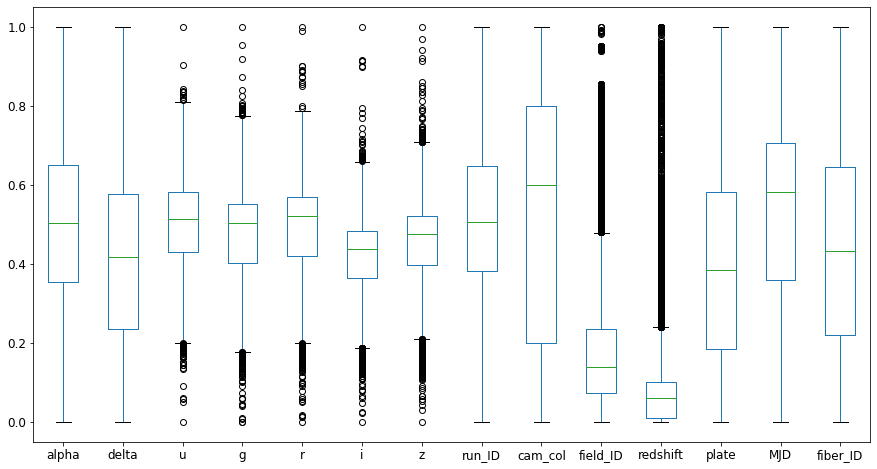

In [18]:
X_norm.boxplot(column= ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col',
                        'field_ID', 'redshift', 'plate', 'MJD', 'fiber_ID'],
               grid = False, figsize = (15, 8), return_type='axes')

#### 2.1.2 Histogram

Displays the frequency distribution of continuous data.

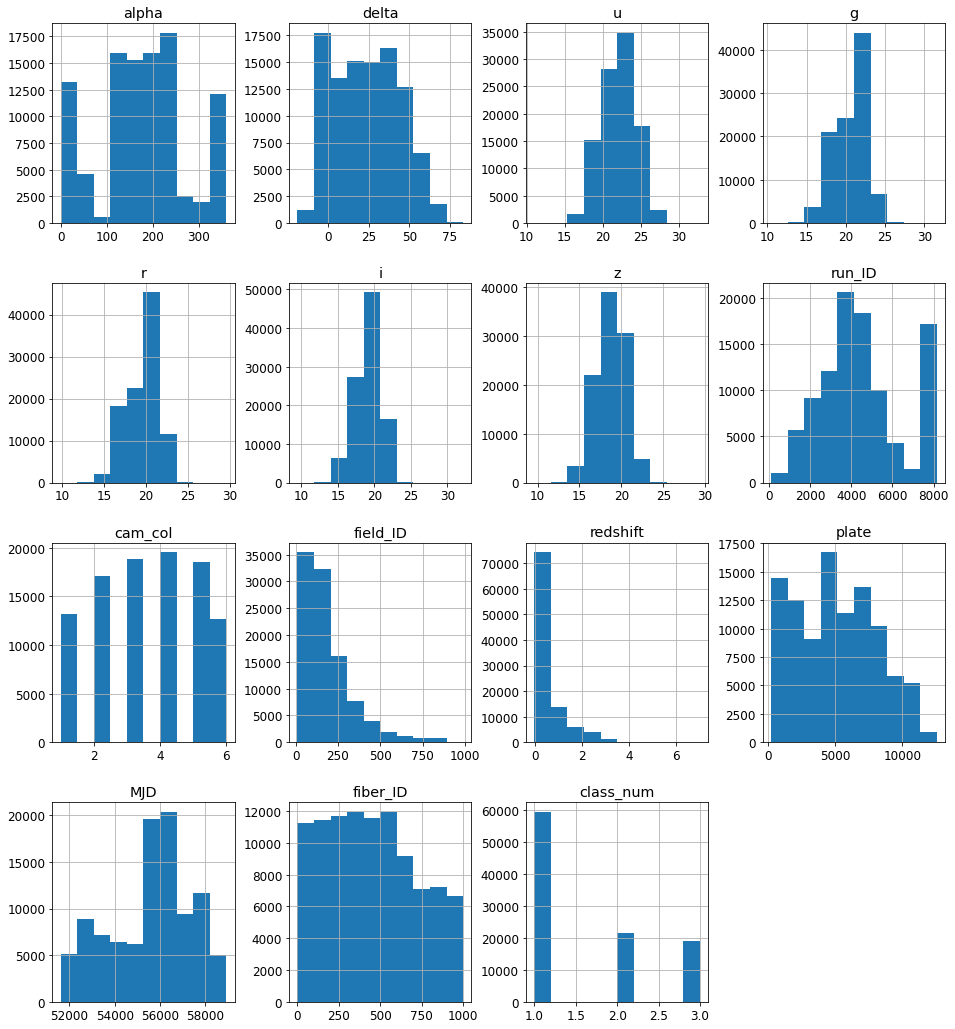

In [19]:
df.hist(figsize=(16,18))
plt.show()

Create a countplot that shows the counts of each object in class

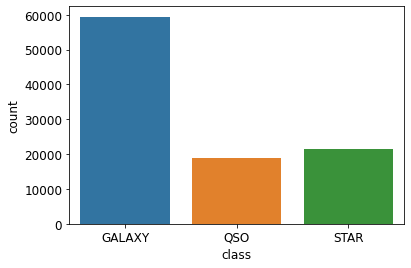

In [20]:
sns.countplot(x='class',data=df)
plt.show()

### 2.2 Correlations

In [21]:
df.corr()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID,class_num
alpha,1.000000,0.138698,-0.000222,-0.014118,-0.022079,-0.023577,-0.025160,-0.013728,0.019587,-0.165593,0.001671,-0.002551,0.019945,0.030469,0.004549
delta,0.138698,1.000000,-0.026845,-0.007077,-0.006845,-0.004488,-0.006286,-0.301270,0.032553,-0.173393,0.031629,0.112322,0.107330,0.028237,0.056650
u,-0.000222,-0.026845,1.000000,0.853350,0.728681,0.618346,0.545760,0.131566,0.007673,-0.013365,0.166816,0.395854,0.436346,0.183174,-0.226930
g,-0.014118,-0.007077,0.853350,1.000000,0.932996,0.847046,0.775302,0.151477,0.007828,-0.022149,0.318910,0.584315,0.610809,0.220396,-0.066894
r,-0.022079,-0.006845,0.728681,0.932996,1.000000,0.962868,0.919114,0.153878,0.008472,-0.026405,0.433237,0.655242,0.671180,0.223100,0.150696
i,-0.023577,-0.004488,0.618346,0.847046,0.962868,1.000000,0.971546,0.147660,0.007609,-0.026665,0.492381,0.661639,0.672522,0.214782,0.284400
z,-0.025160,-0.006286,0.545760,0.775302,0.919114,0.971546,1.000000,0.140461,0.006416,-0.026377,0.501060,0.644331,0.653784,0.203730,0.340914
run_ID,-0.013728,-0.301270,0.131566,0.151477,0.153878,0.147660,0.140461,1.000000,-0.047117,0.031544,0.065386,0.239453,0.262685,0.067147,-0.000039
cam_col,0.019587,0.032553,0.007673,0.007828,0.008472,0.007609,0.006416,-0.047117,1.000000,-0.015662,0.000089,-0.001955,-0.006748,0.121588,0.014481
field_ID,-0.165593,-0.173393,-0.013365,-0.022149,-0.026405,-0.026665,-0.026377,0.031544,-0.015662,1.000000,-0.021313,-0.083459,-0.095059,-0.012312,-0.038057


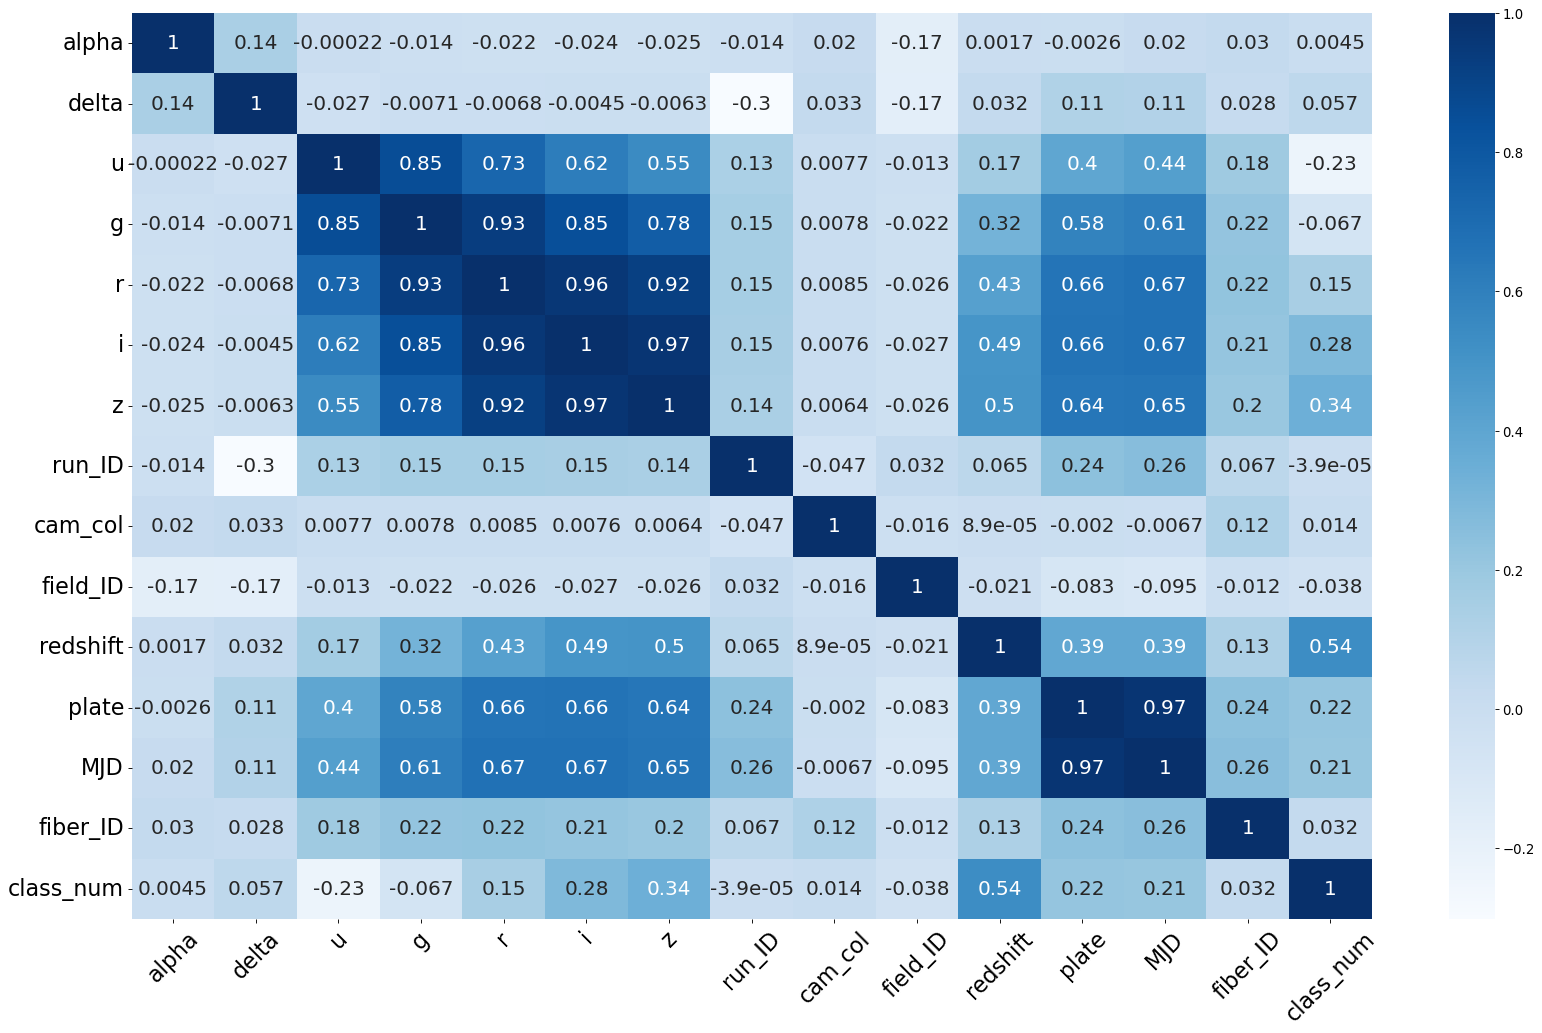

In [22]:
plt.subplots(figsize=(25,15), dpi = 80)
# sns.set(font_scale=1)
sns.heatmap(df.corr(), cmap='Blues',annot=True, annot_kws={"size": 18})
plt.xticks(rotation=45, fontsize = 20)
plt.yticks(rotation=0, fontsize = 20)
plt.show()

There is a strong positive correlation between the following two pair of attributions: g and r, r and i, r and z, i and z, MJD and plate

#### Clustering

In [23]:
from numpy import *

def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)
def distCosine(x,D):

    D_norm = linalg.norm(D) #np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = linalg.norm(x)
    #print("D_norm ",D_norm," x_norm ",x_norm)
    sims = dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dist = 1 - sims

    return dist
'''
randCent(), creates a set of k ran-dom  centroids  for  a  given  dataset.
The  random  centroids  need  to  be  within  thebounds of the dataset.
This is accomplished by finding the minimum and maximumvalues of each dimension
in the dataset.
Random values from 0 to 1.0 are then chosenand  scaled  by  the  range  and
minimum  value  to  ensure  that  the  random  points  arewithin  the  bounds
of  the  data.
'''
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
    return centroids

# kMeans function
def kMeans(dataSet, k, distMeas=distEuclid, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points
    #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

In [24]:
centroids, clusterAssment = kMeans(np.array(X_norm), 3, distEuclid, randCent)

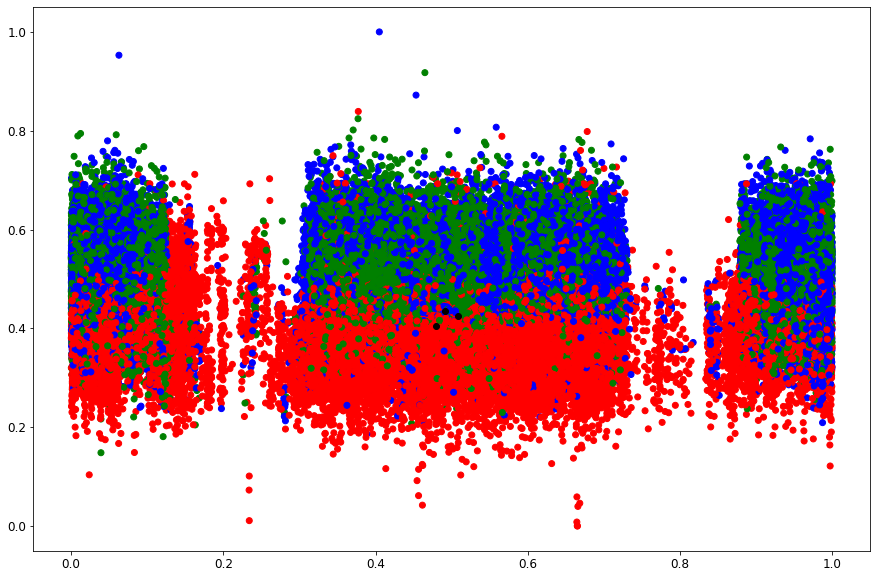

In [25]:
colors = np.array(['red', 'green', 'blue', 'yellow', "orange"])
plt.figure(figsize=(15,10))
plt.scatter(np.array(X_norm)[:, 0], np.array(X_norm)[:, 3], c=colors[np.array(clusterAssment)[:, 0].T.astype(int)])
plt.scatter(centroids[:, 0].tolist(), centroids[:, 1].tolist(), c="black")
plt.show()

## Step 3: Supervised Learning

### 3.1 KNN

we set up the K hyper-parameter with value [1,3,5,7,9,15,19,25,29,35,39,45,49,99]; then for each K value, we calculated the accuracy and RMSE of the training and test set.


In [26]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
rmse_train = []
rmse_test = []
for K in K_list:
    clf = KNeighborsClassifier(n_neighbors=K)  # Initiate the KNN classifier with diff K
    clf.fit(X_train, y_train) # Fit the model
    pred = clf.predict(X_train) # get prediction
    accuracy_train.append(metrics.accuracy_score(y_train, pred)) # Calculate accuracy score for training and add the value into accuracy_train
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, pred)))
    pred = clf.predict(X_val) # get prediction
    accuracy_test.append(metrics.accuracy_score(y_val, pred)) # Calculate accuracy score for testing add the value into accuracy_test
    rmse_test.append(np.sqrt(metrics.mean_squared_error(y_val, pred)))

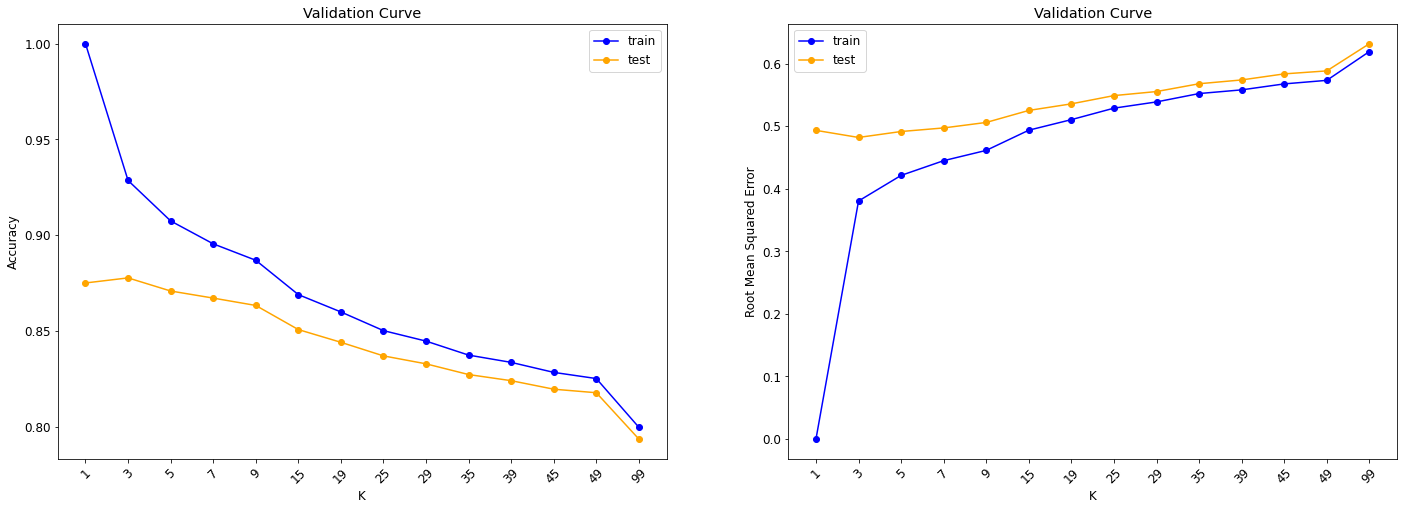

In [27]:
#Plot the validation curve
# f, axs = plt.subplots(2,1,figsize=(20,5),dpi=150)
plt.figure(figsize=(24,8))

plt.subplot(1, 2, 1)
plt.plot(accuracy_train, marker='o', color='blue', label = 'train') # plot the accuracy_train
plt.plot(accuracy_test, color='orange', marker='o', label = 'test') # plot the accuracy_test
plt.title('Validation Curve') # set a title
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation=45) # set tick locations and set the labels of the x-axis
plt.xlabel('K') # set the labels of the x-axis
plt.ylabel('Accuracy') # set the labels of the y-axis
plt.legend() # put a legend on the Axes.

plt.subplot(1, 2, 2)
plt.plot(rmse_train, marker='o', color='blue', label = 'train') # plot the accuracy_train
plt.plot(rmse_test, color='orange', marker='o', label = 'test') # plot the accuracy_test
plt.title('Validation Curve') # set a title
plt.xticks(ticks=np.arange(len(K_list)), labels=K_list, rotation=45) # set tick locations and set the labels of the x-axis
plt.xlabel('K') # set the labels of the x-axis
plt.ylabel('Root Mean Squared Error') # set the labels of the y-axis
plt.legend() # put a legend on the Axes.
plt.show()


According to the above plot, the best k is 3, and the mode after k=3 is underfitting, because the model has both low training and test accuracy. (High Bias model)

#### Grid Search

Using Grid Search to find the best values of hyperparameter.

In [28]:
params = dict(
    n_neighbors = [1,3,5,7,9,15,19,25,29,35,39,45,49,99],
    weights = ['uniform', 'distance']
)

knn = KNeighborsClassifier()
gs_knn = GridSearchCV(estimator=knn, param_grid=params, verbose=1, cv=5)
gs_knn = gs_knn.fit(X_train, y_train)
gs_knn.best_estimator_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


KNeighborsClassifier(n_neighbors=3, weights='distance')

In [29]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')  # Initiate the KNN classifier with diff K
knn.fit(X_train, y_train) # Fit the model

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [30]:
knn_pred_train = knn.predict(X_train)
print("Accuracy Score (Train): ", metrics.accuracy_score(y_true = y_train, y_pred = knn_pred_train))

knn_pred_val = knn.predict(X_val)
print("Accuracy Score (Val): ", metrics.accuracy_score(y_true = y_val, y_pred = knn_pred_val))

Accuracy Score (Train):  1.0
Accuracy Score (Val):  0.8816


In [31]:
y_val_str = y_val.replace([1,2,3],['GALAXY','STAR', 'QSO'],inplace=False)
knn_pred_val_str = pd.DataFrame(knn_pred_val).replace([1,2,3],['GALAXY','STAR', 'QSO'],inplace=False)
print(metrics.classification_report(y_val_str, knn_pred_val_str))

              precision    recall  f1-score   support

      GALAXY       0.87      0.95      0.91     11787
         QSO       0.92      0.83      0.88      3886
        STAR       0.87      0.73      0.79      4327

    accuracy                           0.88     20000
   macro avg       0.89      0.84      0.86     20000
weighted avg       0.88      0.88      0.88     20000



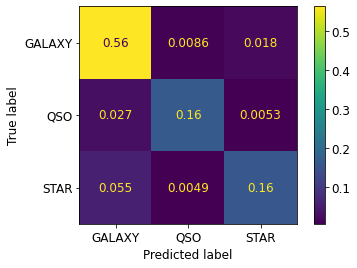

In [32]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_val_str, y_pred=knn_pred_val_str, normalize='all')
plt.grid(False)

#### ROC

In [33]:
def get_roc(clf, X_val, y_val):
    pred_val = clf.predict(X_val)
    pred_proba_val = clf.predict_proba(X_val)

    pred_val_dummies = pd.get_dummies(pred_val)
    y_val_dummies = pd.get_dummies(y_val)

    fpr, tpr, auc = {}, {}, {}
    # name = list(pred_val_dummies.columns)
    name = ['GALAXY','STAR', 'QSO']

    for i in range(pred_val_dummies.shape[1]):
        fpr[name[i]], tpr[name[i]], thresholds = metrics.roc_curve(np.array(y_val_dummies)[:,i], pred_proba_val[:,i])
        auc[name[i]] = metrics.roc_auc_score(np.array(y_val_dummies)[:,i], np.array(pred_val_dummies)[:,i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in fpr.keys()]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in fpr.keys():
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= len(fpr.keys())
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr

    auc["macro"] = metrics.roc_auc_score(y_val_dummies, pred_val_dummies, average='macro', multi_class='ovo')

    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(np.array(y_val_dummies).ravel(), pred_proba_val.ravel())
    auc["micro"] = metrics.roc_auc_score(y_val_dummies, pred_val_dummies, average='micro', multi_class='ovo')

    return fpr, tpr, auc

In [34]:
def plot_roc(fpr, tpr, auc):
    plt.figure(figsize=(15,10))
    for i in fpr.keys():
        if i == "micro" or i == "macro":
            plt.plot(fpr[i], tpr[i], lw = 3, linestyle='--',
                     label='{0}-average ROC curve (area = {1:0.2f})'.format(i, auc[i]))
        else:
            plt.plot(fpr[i], tpr[i], lw = 3,
                     label='ROC curve of class {0} (area = {1:0.2f})'.format(i, auc[i]))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)', fontsize = 15)
    plt.ylabel('Sensitivity(True Positive Rate)', fontsize = 15)
    plt.title('Receiver Operating Characteristic', fontsize = 18)

    plt.legend(fontsize = 18)
    plt.show()

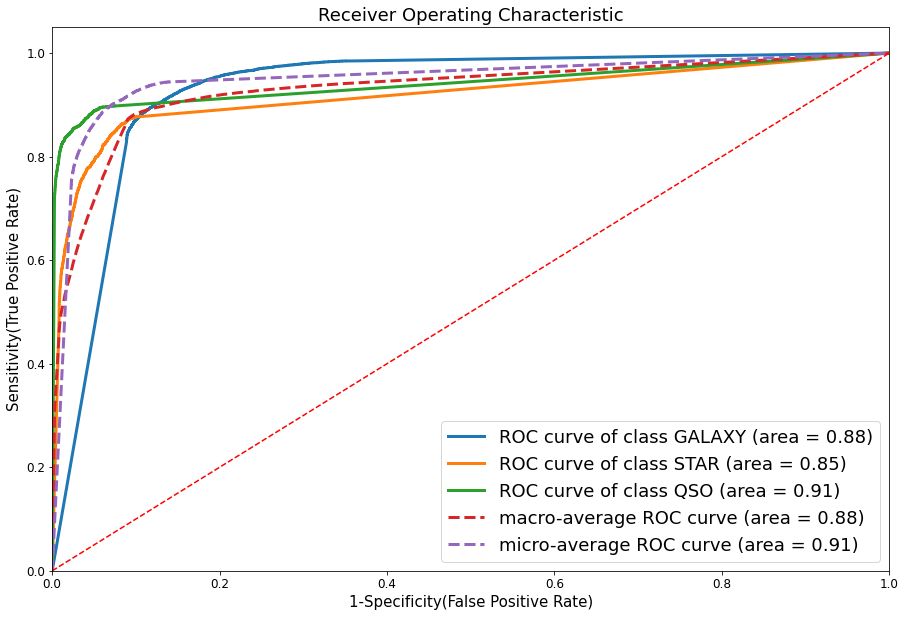

In [35]:
fpr_knn, tpr_knn, auc_knn = get_roc(knn, X_val, y_val)
plot_roc(fpr_knn, tpr_knn, auc_knn)

we got the AUC score of class GALAXY, STAR and QSO, respectively as 0.88, 0.85, 0.91. The average of the AUC for the test set is 0.88. 

### 3.2  Decision trees

The decision tree which uses characteristics to classify a certain object into ‘Star’, ‘Galaxy’ or ‘Object’. Decision Trees from sklearn was used in this case. Initially the process was started without any hyperparameter tuning, so as to get an idea whether or not the regular model would work well with the given data (and the default parameter values).


In [36]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier()
dt1.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# train vs validation predictions to calculate accuracy scores.

dt_pred = dt1.predict(X_train)
dt1_pred = dt1.predict(X_val)

In [38]:
# accuracy scores for train - expecting 100% accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Accuracy Score for train Data: ",accuracy_score(y_train, dt_pred))
print(metrics.classification_report(y_train, dt_pred))

Accuracy Score for train Data:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     47658
           2       1.00      1.00      1.00     17266
           3       1.00      1.00      1.00     15075

    accuracy                           1.00     79999
   macro avg       1.00      1.00      1.00     79999
weighted avg       1.00      1.00      1.00     79999



In [39]:
#accuruacy scores + classification report for validation set

print("Accuracy Score for validation Data: ", accuracy_score(y_val, dt1_pred))
print(metrics.classification_report(y_val, dt1_pred))

Accuracy Score for validation Data:  0.96205
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     11787
           2       0.99      0.99      0.99      4327
           3       0.91      0.92      0.91      3886

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



Shows a relatively high accuracy of 96%. This could be due to certain factors such as overfitting which can often be fixed with hyperparameter tuning using Grid Search Cross Validation.

In [40]:
from sklearn.metrics import confusion_matrix
conf_test1 = confusion_matrix(y_val, dt1_pred)
print(conf_test1)

[[11383    41   363]
 [   33  4292     2]
 [  320     0  3566]]


The main hyperparameters picked for this process were ‘criterion’ which would have two options of either ‘gini’ or ‘entropy’, followed by the max_depth which is the max depth of the tree being created. This had a list of values from 2 till 12 in increments of 2. Lastly, this was followed by min_samples_split which is essentially the minimum number of samples required to split an internal code.


In [41]:
# grid search
# max_depth helps with complexity of the model which helps reduce any potential overfitting
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [5, 10, 15, 25]
}

dt2 = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt2, parameters, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [5, 10, 15, 25]})

In [42]:
best_estimator=clf.best_estimator_

In [43]:
best_estimator

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=25)

In [44]:
# refitting the model with new parameters to the training set and predicting on the validation set
dt_new = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=25)
dt_new.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=25)

In [45]:
dt_new_pred = dt_new.predict(X_val)
dt_new_pred

array([3, 1, 1, ..., 1, 3, 2])

Once we make predictions we run the accuracy score metric again to see if there is any improvement in it. In most cases there is little to no improvement considering the accuracy is already high. However, in this case, we were able to increase the accuracy to 97.205% with the help of hyperparameter tuning.

In [46]:
# metrics for prediction with new model on validation set
print("Accuracy Score for validation Data: ", accuracy_score(y_val, dt_new_pred))
print(metrics.classification_report(y_val, dt_new_pred))

Accuracy Score for validation Data:  0.97205
              precision    recall  f1-score   support

           1       0.97      0.98      0.98     11787
           2       0.99      1.00      0.99      4327
           3       0.95      0.92      0.94      3886

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



Above shows the rest of evaluation metrics as well, showing very little change compared to the outcome before hyperparameter tuning.
The outcome of using hyperparameter tuning despite not providing us with large changes to the model, lets us know that there are certain values of each parameter that would potentially improve the model’s success and accuracy.

[Text(140.84134615384616, 205.35999999999999, 'X[10] <= 0.002\nentropy = 1.376\nsamples = 79999\nvalue = [47658, 17266, 15075]'),
 Text(49.38977732793522, 181.2, 'X[12] <= 0.685\nentropy = 0.159\nsamples = 17672\nvalue = [403, 17266, 3]'),
 Text(32.700607287449394, 157.04, 'X[10] <= 0.002\nentropy = 0.112\nsamples = 14030\nvalue = [203, 13824, 3]'),
 Text(19.315384615384616, 132.88, 'X[10] <= 0.001\nentropy = 0.103\nsamples = 13967\nvalue = [184, 13781, 2]'),
 Text(6.099595141700405, 108.72, 'X[10] <= 0.001\nentropy = 0.021\nsamples = 3473\nvalue = [7, 3466, 0]'),
 Text(2.710931174089069, 84.56, 'X[10] <= 0.001\nentropy = 0.722\nsamples = 25\nvalue = [5, 20, 0]'),
 Text(1.3554655870445345, 60.400000000000006, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(4.066396761133603, 60.400000000000006, 'entropy = 0.439\nsamples = 22\nvalue = [2, 20, 0]'),
 Text(9.488259109311741, 84.56, 'X[3] <= 0.553\nentropy = 0.007\nsamples = 3448\nvalue = [2, 3446, 0]'),
 Text(6.777327935222672, 60

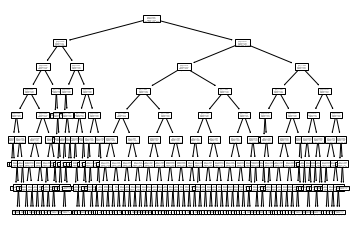

In [47]:
from sklearn import tree
tree.plot_tree(dt_new)

### 3.3 Bayesian Classification

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
gnb = GaussianNB()

In [50]:
gnb = gnb.fit(X_train, y_train)

In [51]:
nb_pred = gnb.predict(X_train)

In [52]:
nb1_pred = gnb.predict(X_val)

In [53]:
print("Accuracy Score for train Data: ",accuracy_score(y_train, nb_pred))
print(metrics.classification_report(y_train, nb_pred))

Accuracy Score for train Data:  0.8979487243590545
              precision    recall  f1-score   support

           1       0.96      0.87      0.91     47658
           2       0.98      0.99      0.98     17266
           3       0.69      0.88      0.78     15075

    accuracy                           0.90     79999
   macro avg       0.88      0.91      0.89     79999
weighted avg       0.91      0.90      0.90     79999



In [54]:
print("Accuracy Score for val Data: ",accuracy_score(y_val, nb1_pred))
print(metrics.classification_report(y_val, nb1_pred))

Accuracy Score for val Data:  0.89965
              precision    recall  f1-score   support

           1       0.96      0.87      0.91     11787
           2       0.98      0.99      0.98      4327
           3       0.70      0.89      0.79      3886

    accuracy                           0.90     20000
   macro avg       0.88      0.92      0.89     20000
weighted avg       0.91      0.90      0.90     20000



There is a slight increase in the accuracy score for the validation data as shown -> from 0.8979 for the training accuracy to 0.89965 for the validation. This is relatively strange considering when we train the data on the training set and then predict on the same set, we would usually expect an accuracy of 100%. This means there is some underfitting occuring in the model.

In [55]:
conf_test2 = confusion_matrix(y_val, nb1_pred)
print(conf_test2)

[[10273   100  1414]
 [   26  4266    35]
 [  432     0  3454]]


In [56]:
# grid search
parameters1 = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb1 = GaussianNB()
nb_gs = GridSearchCV(estimator=gnb1,
                     param_grid=parameters1,
                     cv=5,   # use any cross validation technique
                     n_jobs=-1)
nb_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [57]:
best_estimator=nb_gs.best_estimator_

In [58]:
best_estimator

GaussianNB(var_smoothing=1.873817422860383e-07)

In [59]:
gnb3 = GaussianNB(var_smoothing=1.873817422860383e-07)

In [60]:
gnb3.fit(X_train, y_train)

GaussianNB(var_smoothing=1.873817422860383e-07)

In [61]:
gnb3_pred = gnb3.predict(X_val)

In [62]:
print("Accuracy Score for validation Data: ", accuracy_score(y_val, gnb3_pred))
print(metrics.classification_report(y_val, gnb3_pred))

Accuracy Score for validation Data:  0.90105
              precision    recall  f1-score   support

           1       0.96      0.87      0.91     11787
           2       0.98      0.99      0.98      4327
           3       0.71      0.89      0.79      3886

    accuracy                           0.90     20000
   macro avg       0.88      0.92      0.90     20000
weighted avg       0.91      0.90      0.90     20000



We have increased the accuracy finally to 90.1% which is a small improvement from the previous accuracies on the validation set.

### 3.4 Support vector machine (SVM)

The sklearn.svm module and SVC function was used to construct the SVM model.   The data used for this model was composed of an 80/20 split for training and test sets.  The training data consisted of 79,999 observations and 20,000 for the test data set.  For this model, the dependent variable was “Class”.  The “Class” variable can be one of three possible values; Galaxy, QSO or Star.  The independent variables were; alpha, delta, u, g, r, i, z, run_ID, cam_col, field_ID, redshift, plate, MJD, fiber_ID and class_num.

In [63]:
train_outcome = pd.crosstab(index=df['class'] , columns="count")

train_outcome

col_0,count
class,
GALAXY,59445
QSO,18961
STAR,21593


In [64]:
# Create SVM Classifier and Fit the Model

from sklearn.svm import SVC

svm_clf = SVC(probability=True)

svm_clf = svm_clf.fit(X_train, y_train)

In [65]:
# Predict Response on Training and Test set

svm_pred_train = svm_clf.predict(X_train)
svm_pred_test = svm_clf.predict(X_val)

In [66]:
# Calculate and Print the Accuracy Score and Classification Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy Score for Train Data: ",accuracy_score(y_train, svm_pred_train) )
print("Accuracy Score for Test Data: ", accuracy_score(y_val, svm_pred_test) )
print("\n")
print("Classification Report for Training Data: ")
print(metrics.classification_report(y_train, svm_pred_train) )
print("\n")
print("Classification Report for Test Data: ")
print(metrics.classification_report(y_val, svm_pred_test))

Accuracy Score for Train Data:  0.952236902961287
Accuracy Score for Test Data:  0.94975


Classification Report for Training Data: 
              precision    recall  f1-score   support

           1       0.95      0.97      0.96     47658
           2       0.94      0.95      0.94     17266
           3       0.97      0.90      0.93     15075

    accuracy                           0.95     79999
   macro avg       0.95      0.94      0.95     79999
weighted avg       0.95      0.95      0.95     79999



Classification Report for Test Data: 
              precision    recall  f1-score   support

           1       0.95      0.97      0.96     11787
           2       0.93      0.95      0.94      4327
           3       0.97      0.90      0.94      3886

    accuracy                           0.95     20000
   macro avg       0.95      0.94      0.94     20000
weighted avg       0.95      0.95      0.95     20000



The accuracy scores were used as the overall performance measure.  The scores were recorded for both the training and test sets.  The following indicates that the training data had an accuracy score of 95% and the test data had an accuracy score of 94%.


In [67]:
# Print the Confusion Matrix for Training and Test sets

from sklearn.metrics import confusion_matrix

svm_conf_matrix = confusion_matrix(y_val, svm_pred_test)
svm_conf_matrix_train = confusion_matrix(y_train, svm_pred_train)

print("Confusion Matrix for Training set:")
print(svm_conf_matrix_train)
print("\n")
print("Confusion Matrix for Test set:")
print(svm_conf_matrix)

Confusion Matrix for Training set:
[[46123  1104   431]
 [  808 16458     0]
 [ 1438    40 13597]]


Confusion Matrix for Test set:
[[11397   286   104]
 [  232  4095     0]
 [  373    10  3503]]


<AxesSubplot:>

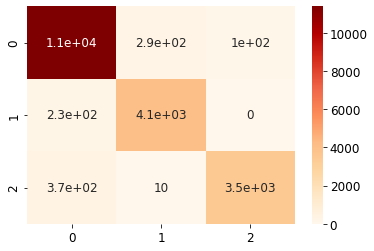

In [68]:
# Plot the Confusion Matrix using Heatmap for Test set

sns.heatmap(svm_conf_matrix, annot=True, cmap='OrRd')

/Users/hangzhao/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


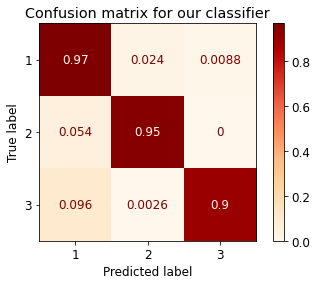

In [69]:
# Plot the Confusion Matrix Displaying Percentages for Test set

from sklearn.metrics import plot_confusion_matrix

svm_plot_matrix = plot_confusion_matrix(svm_clf, X_val, y_val,
                                        cmap=plt.cm.OrRd,
                                        normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(svm_plot_matrix)
plt.show()

To ensure that this model was accurate, the parameters were tuned using sklearn’s GridSearchCV module.  Due to the size of the data set, a subset was created by performing a 95/5 split on the data with 5% for the training and 95% for the test set.  This training set was composed of 5000 observations.  This allowed the GridSearchCV module to run in a shorter time frame.

In [70]:
# SVM Hyper-Parameter Tuning

svc = SVC()

parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [1, 0.5, 0.25, 0.1, 0.01],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

grid_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, n_jobs=-1)

# grid_cv.fit(X_train, y_train)

In [71]:
X_train_subset, X_val_subset, y_train_subset, y_val_subset = train_test_split(X_norm, y, test_size=0.95, random_state=33)

In [72]:
X_train_subset.shape, y_train_subset.shape, X_val_subset.shape, y_val_subset.shape

((4999, 14), (4999,), (95000, 14), (95000,))

In [73]:
#grid_cv.fit(X_train, y_train)

grid_cv.fit(X_train_subset, y_train_subset)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [1, 0.5, 0.25, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']})

In [74]:
# Display Best Parameters

grid_cv.best_estimator_

SVC(C=10, gamma=1, kernel='poly')

In [75]:
# Fit Model using Best Parameters

svm_pred_2 = grid_cv.best_estimator_.predict(X_val)

In [76]:
# Calculate and Print the Confusion Matirix, Accuracy Score and Classification Report

svm_conf_matrix_2 = confusion_matrix(y_val, svm_pred_2)
print('Grid Confusion Matrix: ')
print(svm_conf_matrix_2)
print("\n")

print('Accuracy Score for Grid Search:', accuracy_score(y_val, svm_pred_2) )
print("\n")

print('Classification Report for Grid Search:')
print(metrics.classification_report(y_val, svm_pred_2))

Grid Confusion Matrix: 
[[11376   254   157]
 [   91  4236     0]
 [  450     0  3436]]


Accuracy Score for Grid Search: 0.9524


Classification Report for Grid Search:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96     11787
           2       0.94      0.98      0.96      4327
           3       0.96      0.88      0.92      3886

    accuracy                           0.95     20000
   macro avg       0.95      0.94      0.95     20000
weighted avg       0.95      0.95      0.95     20000



The SVM prediction was then performed on the original data using the “best_estimators”.   The accuracy score was 95% for the test data set, as indicated below.  This indicates that the SVM model performed well.


<b>Principal Component Analysis (PCA) for SVM </b>

To add more assurance to the performance of this model, a principal component analysis (PCA) was performed on the original data set.  The original data set included 15 parameters, this was reduced to 9 components/parameters.

In [77]:
# Attempt dimension reduction using PCA and transform data

from sklearn.decomposition import PCA

pca = PCA(n_components=9)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_val)

X_train_pca.shape

(79999, 9)

In [78]:
# Check PCA matrix to ensure that there are 9 PCA components

# pca.components_

In [79]:
# pca.n_components_

In [80]:
# Fit model using the transformed PCA training data
svm_clf_pca = SVC(probability=True)
svm_clf_pca.fit(X_train_pca, y_train)

svm_pred_pca = svm_clf_pca.predict(X_test_pca)

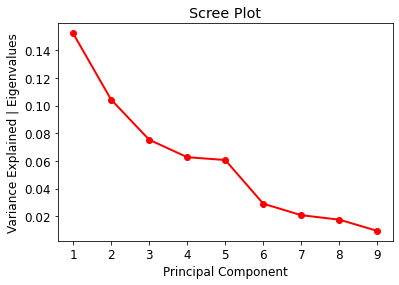

In [81]:
PC_values = np.arange(pca.n_components_) + 1

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained | Eigenvalues')
#plt.axhline(y=1, color='blue', linestyle='--')
plt.plot(PC_values,pca.explained_variance_, 'o-', linewidth=2, color='red')

plt.show()

# Eigenvalues are the explained variance..

The plot indicates that it may be possible to construct the model using 5 components/parameters


In [82]:
print(pca.explained_variance_ratio_)

[0.28238072 0.19349981 0.13978882 0.11636031 0.11257513 0.05405777
 0.03865123 0.03265163 0.01759103]


In [83]:
# Pring Accuracy Score and Classification Report

print("Accuracy Score: ", accuracy_score(y_val, svm_pred_pca) )
print ("\n")
print("Classification Report:")
print(metrics.classification_report(y_val, svm_pred_pca))

Accuracy Score:  0.85895


Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.96      0.89     11787
           2       0.86      0.56      0.68      4327
           3       0.97      0.89      0.93      3886

    accuracy                           0.86     20000
   macro avg       0.89      0.80      0.83     20000
weighted avg       0.86      0.86      0.85     20000



The overall accuracy is 86%, which means that this model does perform well using some feature reduction. In this particular case, it isn't needed, but was performed to check against the performance of the original SVM model.


## Step 4. Conclusion / Analysis

In [84]:
# Disable Jupyter Warnings

import warnings
warnings.filterwarnings('ignore')

In [85]:
# utility function to calculate classifier metrics
def classifier_metrics(y_val, pred_val):
    accuracy  = metrics.accuracy_score(y_val, pred_val)
    precision = metrics.precision_score(y_val, pred_val, average='macro')
    recall    = metrics.recall_score(y_val, pred_val, average='macro')
    f1        = metrics.f1_score(y_val, pred_val, average='macro')
    specif    = metrics.recall_score(y_val, pred_val, pos_label=0, average='macro')
    balanced  = metrics.balanced_accuracy_score(y_val, pred_val)

    return [accuracy, precision, recall, f1, specif, balanced]

In [86]:
# KNN
KNN_ls = ['KNN'] + classifier_metrics(y_val, knn_pred_val)
# Decision Trees
DT_ls = ['Decision Trees'] + classifier_metrics(y_val, dt_new_pred)
# Bayesian Classification
NB_ls = ['Naive Bayes'] + classifier_metrics(y_val, gnb3_pred)
# SVM
svm_ls = ['SVM'] + classifier_metrics(y_val, svm_pred_test)
# SVM with PCA
svm_pca_ls = ['SVM PCA'] + classifier_metrics(y_val, svm_pred_pca)

In [87]:
# Print Results Table

conclusion = []

conclusion.append(KNN_ls)
conclusion.append(DT_ls)
conclusion.append(NB_ls)
conclusion.append(svm_ls)
conclusion.append(svm_pca_ls)

col_label = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificy', 'Balanced Accuracy']

pd.DataFrame(conclusion, columns=col_label)

,Classifier,Accuracy,Precision,Recall,F1-Score,Specificy,Balanced Accuracy
0,KNN,0.88160,0.888793,0.838198,0.859997,0.838198,0.838198
1,Decision Trees,0.97205,0.971065,0.965357,0.968084,0.965357,0.965357
2,Naive Bayes,0.90105,0.880533,0.917927,0.895049,0.917927,0.917927
3,SVM,0.94975,0.951116,0.938246,0.944205,0.938246,0.938246
4,SVM PCA,0.85895,0.887397,0.802157,0.831688,0.802157,0.802157


### ROC

In [88]:
fpr_dt, tpr_dt, auc_dt = get_roc(dt_new, X_val, y_val)
fpr_gnb, tpr_gnb, auc_gnb = get_roc(gnb3, X_val, y_val)
fpr_svm, tpr_svm, auc_svm = get_roc(svm_clf, X_val, y_val)
fpr_svm_pca, tpr_svm_pca, auc_svm_pca = get_roc(svm_clf_pca, X_test_pca, y_val)
model_roc = {
    'KNN': [fpr_knn, tpr_knn, auc_knn],
    'DT': [fpr_dt, tpr_dt, auc_dt],
    'GNB': [fpr_gnb, tpr_gnb, auc_gnb],
    'SVM': [fpr_svm, tpr_svm, auc_svm],
    'SVM PCA': [fpr_svm_pca, tpr_svm_pca, auc_svm_pca]
}

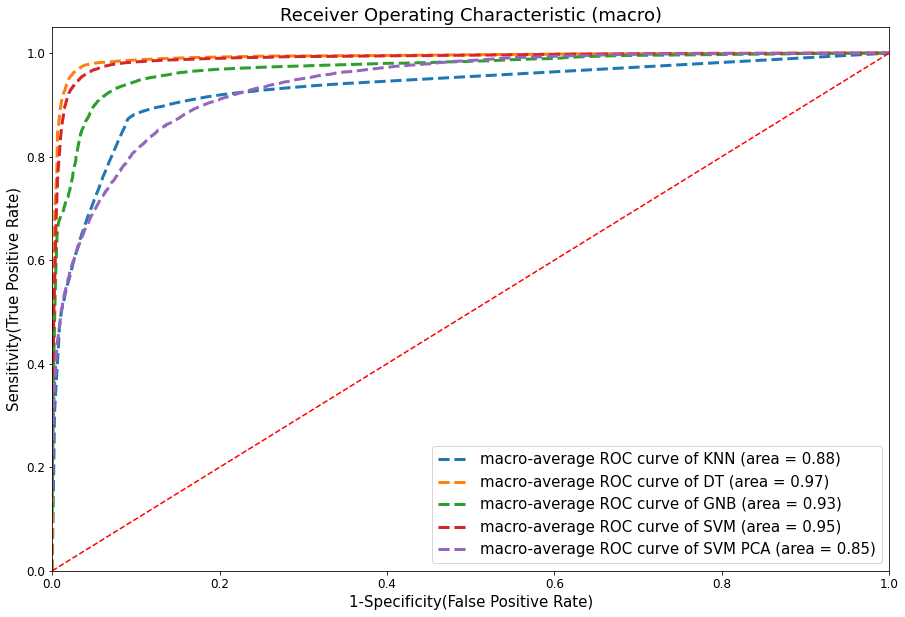

In [89]:
plt.figure(figsize=(15,10))
for m in model_roc.keys():
    plt.plot(model_roc[m][0]["macro"], model_roc[m][1]["macro"], lw = 3, linestyle='--',
             label='macro-average ROC curve of {0} (area = {1:0.2f})'.format(m, model_roc[m][2]["macro"]))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)', fontsize = 15)
plt.ylabel('Sensitivity(True Positive Rate)', fontsize = 15)
plt.title('Receiver Operating Characteristic (macro)', fontsize = 18)

plt.legend(fontsize = 15)
plt.show()

The metrics used to determine the best model was their ROC Curve and their accuracy scores. After reviewing the metrics, the model that offered the best performance for this data set is the “Decision Tree” model.